In [1]:
from algorithms import UCB
import numpy as np
import sys
from util.constants import JointFeatureMode
from util import utility_functions
import matplotlib.pyplot as plt

import logging
logging.basicConfig(stream=sys.stdout, format='%(asctime)s | %(name)s (%(levelname)s):\t %(message)s')

In [2]:
repitition_num = 50
parametrizations = utility_functions.get_parameterization_saps()
features = utility_functions.get_features_saps()
running_time = utility_functions.get_run_times_saps()
regret_ucb = np.zeros((repitition_num, features.shape[0]))
execution_time_ucb = np.zeros(repitition_num)

## Upper Confidence Bound (baseline)

In [3]:
for rep in range(repitition_num):
    print(f"Rep no.: {rep + 1}")
    ucb = UCB(random_state=np.random.RandomState(515), parametrizations=parametrizations, features=features, running_time=running_time)
    ucb.run()
    regret_ucb[rep] = ucb.get_regret()
    execution_time_ucb[rep] = ucb.execution_time

Rep no.: 1
2022-10-12 11:28:15,771 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  53.19909153878689
2022-10-12 11:29:08,972 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 2
2022-10-12 11:29:31,543 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  53.87867025192827
2022-10-12 11:30:25,423 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 3
2022-10-12 11:30:48,604 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  51.74580823816359
2022-10-12 11:31:40,352 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 4
2022-10-12 11:32:02,433 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  51.157133551780134
2022-10-12 11:32:53,592 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 5
2022-10-12 11:33:16,247 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  48.634869317058474
2022-10-12 11:34:04,883 | UpperConfidenceBound (INFO):	 Algorithm Finis

In [4]:
# regret = ucb.get_regret().astype("float64")
print(regret_ucb.shape)
np.savetxt('regret_ucb.txt', regret_ucb)

(50, 5000)


In [ ]:
regret_50 = np.loadtxt('regret_ucb.txt')
regret_50.shape

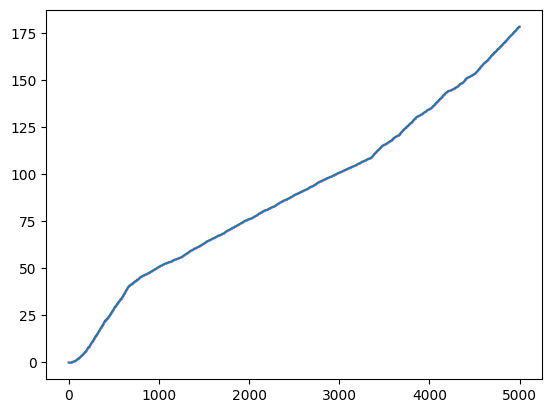

In [8]:
plt.plot(np.mean(cum_reg_ucb, axis=0))
plt.fill_between(
    range(len(cum_reg_ucb[0])), 
    np.mean(cum_reg_ucb, axis=0)-np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    np.mean(cum_reg_ucb, axis=0)+np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    color='red',
    alpha=0.5
)
plt.show()

# Testing utility code

In [ ]:
from util.utility_functions import get_run_times_mips
get_run_times_mips().shape

In [ ]:
winners = []
for skill in running_time:
    winners.append(np.argmax(skill))

In [11]:
non_winner_selection = dict()
for i, selection in enumerate(ucb.temp_selec):
    if winners[i] in selection:
        pass
    else:
        non_winner_selection[i] = f"{winners[i]} + {selection}"
len(non_winner_selection)

2903